<a href="https://colab.research.google.com/github/bethcurran/PACE/blob/main/ML4Floods_BuildingFootprint_Reduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install git+https://github.com/spaceml-org/ml4floods#egg=ml4floods

In [ ]:
import os
import geopandas as gpd


# Loading in And Visualising Flood Map Data

In [ ]:
map_file = '/content/drive/MyDrive/PACE_ML4Floods/Team Workspace/data_noSharing/0_DEV_1_Staging_operational_EMSR586_prepostflood_2022-06-26_2022-06-27_2022-07-17.geojson'

In [ ]:
syd_map = gpd.read_file(map_file)

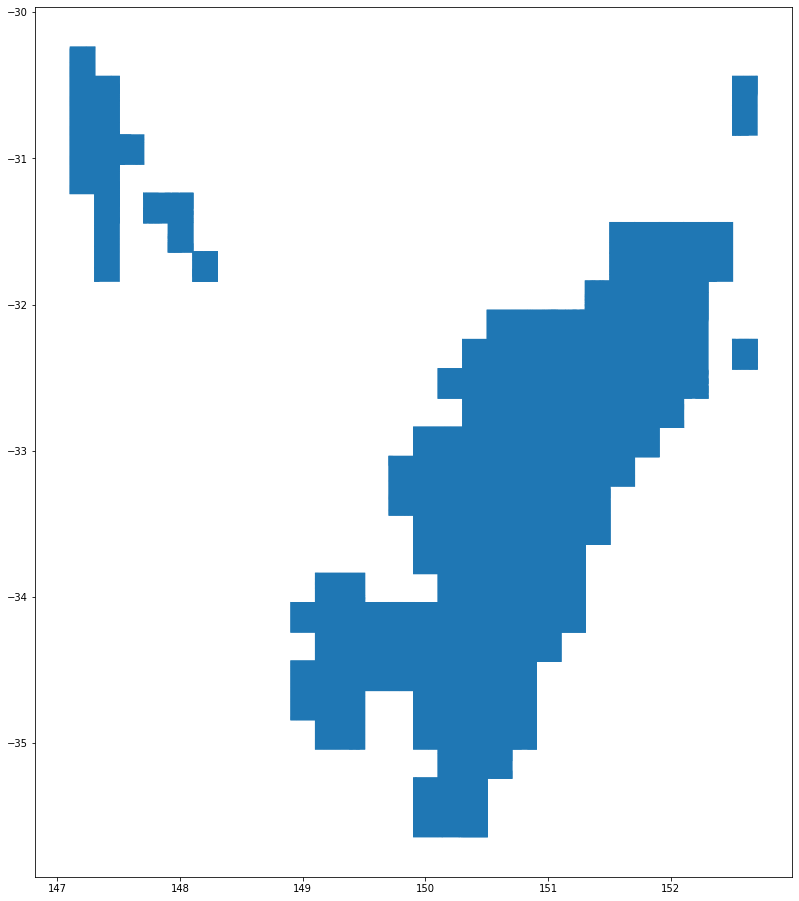

In [ ]:
poly_map = syd_map.plot(figsize=(16, 16))

In [ ]:
classes = syd_map['class'].unique()
print(classes)

['area_imaged' 'area_imaged-pre-flood' 'cloud' 'cloud-pre-flood'
 'flood-trace' 'water-post-flood' 'water-pre-flood']


In [ ]:
flood_trace = syd_map.groupby('class').get_group('flood-trace')

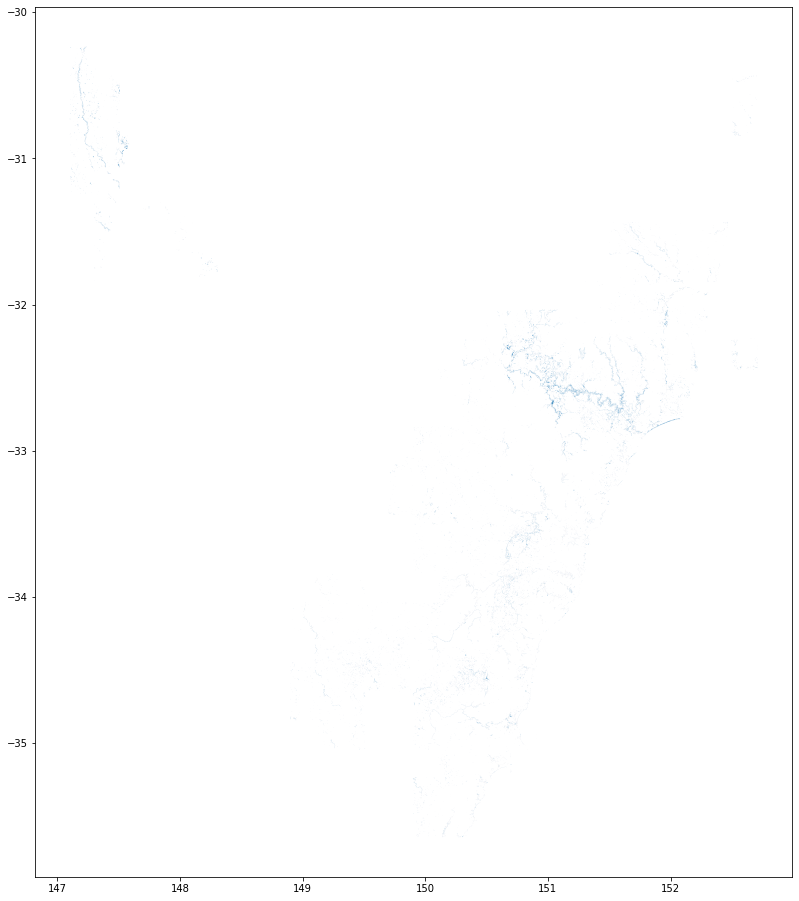

In [ ]:
flood_map = flood_trace.plot(figsize=(16, 16))

In [ ]:
footprint_file = '/content/drive/MyDrive/PACE_ML4Floods/Australia.geojson'

In [ ]:
footprint = gpd.read_file(footprint_file)

In [ ]:
import numpy as np

In [ ]:
syd_map.geometry

0        POLYGON ((149.30449 -35.04436, 149.29995 -35.0...
1        POLYGON ((147.39662 -31.63683, 147.39641 -31.6...
2        POLYGON ((148.09970 -31.83623, 148.09991 -31.8...
3        POLYGON ((152.49992 -32.24480, 152.49970 -32.2...
4        POLYGON ((152.68708 -30.64361, 152.68701 -30.6...
                               ...                        
91120    POLYGON ((152.66383 -30.43810, 152.66383 -30.4...
91121    POLYGON ((152.68799 -30.43545, 152.68841 -30.4...
91122    POLYGON ((152.66217 -30.43593, 152.66217 -30.4...
91123    POLYGON ((152.69862 -30.43512, 152.69883 -30.4...
91124    POLYGON ((152.59635 -30.43556, 152.59614 -30.4...
Name: geometry, Length: 91125, dtype: geometry

In [ ]:
syd_poly_idx = np.arange(0, 91125, 1, dtype=int)
print(poly_idx)

[    0     1     2 ... 91122 91123 91124]


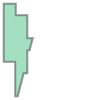

In [ ]:
syd_map.geometry[1]

## Applying the boundaries from the Sydney map to the footprint file

In [ ]:
print(syd_map.total_bounds)

[147.09970091 -35.64452239 152.70949137 -30.23472209]


In [ ]:
xmin, ymin, xmax, ymax = syd_map.total_bounds

syd_footprint = footprint.cx[xmin:xmax, ymin:ymax]

In [ ]:
footprint.geometry

0           POLYGON ((105.67199 -10.43248, 105.67205 -10.4...
1           POLYGON ((113.53996 -25.93019, 113.54000 -25.9...
2           POLYGON ((112.85714 -25.24328, 112.85715 -25.2...
3           POLYGON ((105.68047 -10.42363, 105.68060 -10.4...
4           POLYGON ((105.67603 -10.42271, 105.67611 -10.4...
                                  ...                        
11334861    POLYGON ((153.61595 -28.64265, 153.61600 -28.6...
11334862    POLYGON ((153.61613 -28.66026, 153.61598 -28.6...
11334863    POLYGON ((153.61697 -28.65092, 153.61701 -28.6...
11334864    POLYGON ((153.61701 -28.64932, 153.61705 -28.6...
11334865    POLYGON ((153.61995 -28.65585, 153.62006 -28.6...
Name: geometry, Length: 11334866, dtype: geometry

In [ ]:
syd_footprint.geometry

374186      POLYGON ((147.10134 -35.30394, 147.10140 -35.3...
374602      POLYGON ((147.11216 -34.19285, 147.11209 -34.1...
374634      POLYGON ((147.11363 -32.84845, 147.11368 -32.8...
374794      POLYGON ((147.11665 -35.07881, 147.11641 -35.0...
375210      POLYGON ((147.12416 -33.05343, 147.12424 -33.0...
                                  ...                        
11271691    POLYGON ((152.69374 -31.43592, 152.69372 -31.4...
11271899    POLYGON ((152.70009 -30.86670, 152.70016 -30.8...
11272003    POLYGON ((152.70255 -31.63902, 152.70260 -31.6...
11272029    POLYGON ((152.70282 -31.62949, 152.70282 -31.6...
11272185    POLYGON ((152.70635 -30.89607, 152.70647 -30.8...
Name: geometry, Length: 2659256, dtype: geometry

In [ ]:
syd_footprint.to_file("syd_footprint.geojson", driver='GeoJSON')